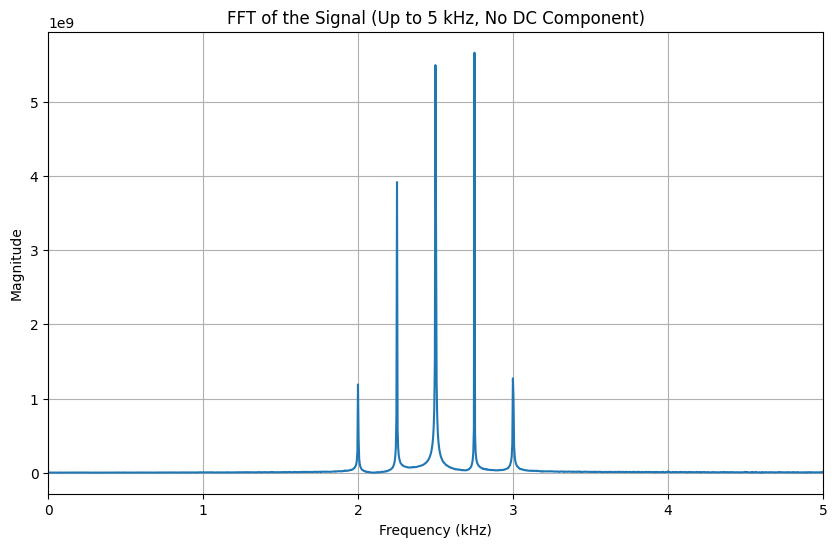

[(2.750396728515625, 5661184431.070928),
 (2.498626708984375, 5493815757.194831),
 (2.25067138671875, 3917609177.323264),
 (2.50244140625, 3174143124.5194764),
 (2.49481201171875, 1484169869.9750192)]

In [17]:
from scipy.fft import fft
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Replace 'file_path' with the actual path to your Excel file
file_path = '5_freq_65536.xlsx'

try:
    df = pd.read_excel(file_path, header=None)
except Exception as e:
    print(f"An error occurred: {e}")

# Constants
sample_rate = 250000  # Sample rate in Hz
delta_t = 4e-6  # Time interval in seconds

# Extracting the time and signal values
time = df.iloc[:, 0].to_numpy()
signal = df.iloc[:, 1].to_numpy()

# Number of sample points
N = len(signal)

# Compute the FFT
y_fft = fft(signal)
frequencies = np.fft.fftfreq(N, d=delta_t)

# Removing the DC component and limiting frequencies to 5 kHz
positive_frequencies = frequencies[:N // 2]
positive_magnitudes = np.abs(y_fft)[:N // 2]
non_dc_indices = np.where(positive_frequencies > 0)
filtered_frequencies = positive_frequencies[non_dc_indices]
filtered_magnitudes = positive_magnitudes[non_dc_indices]
max_frequency_limit = 5000  # 5 kHz
limited_indices = np.where(filtered_frequencies <= max_frequency_limit)
limited_frequencies = filtered_frequencies[limited_indices]
limited_magnitudes = filtered_magnitudes[limited_indices]

# Plotting the FFT with the limited frequency range and without the DC component
limited_frequencies_kHz = limited_frequencies / 1000  # Convert to kHz
plt.figure(figsize=(10, 6))
plt.plot(limited_frequencies_kHz, limited_magnitudes)
plt.title("FFT of the Signal (Up to 5 kHz, No DC Component)")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Magnitude")
plt.xlim([0, max_frequency_limit / 1000])  # Convert x-axis limit to kHz
plt.grid()
plt.show()